# Heart Disease Dataset EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import accuracy_score, mutual_info_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
data = pd.read_csv("../Downloads/heart.csv")

In [4]:
data.shape

(918, 12)

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


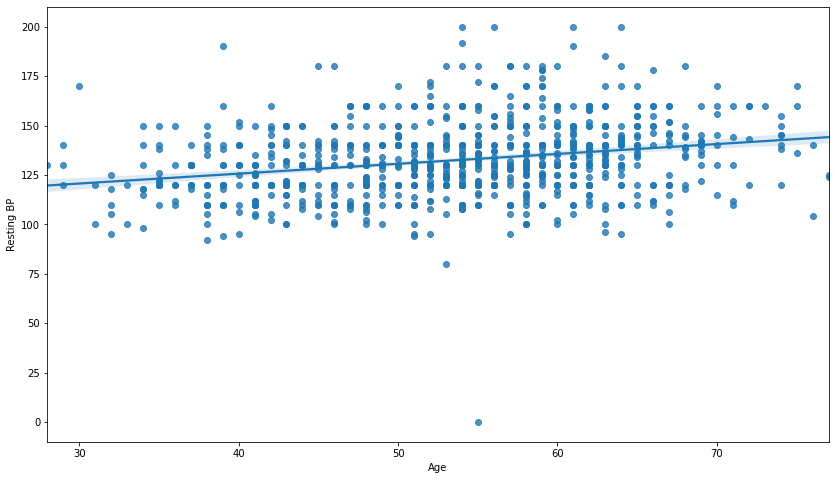

In [8]:
plt.figure(figsize=(14,8))
sns.regplot(x='Age', y='RestingBP', data=data)
plt.xlabel("Age")
plt.ylabel("Resting BP")
plt.show()

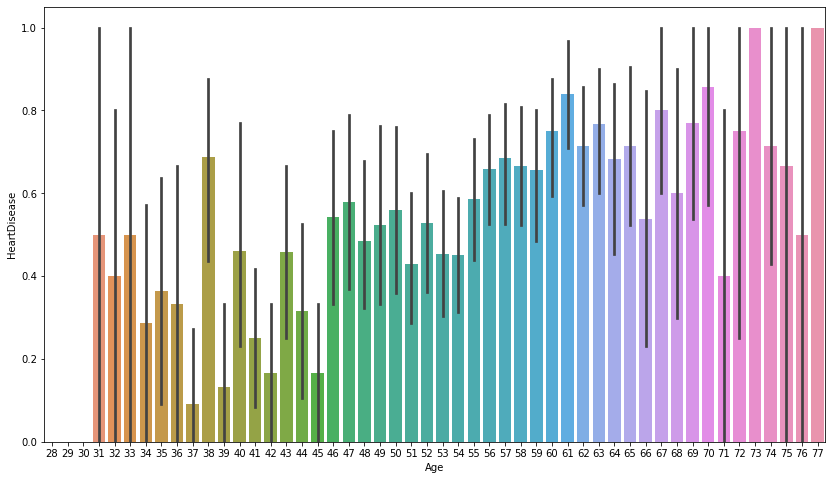

In [9]:
plt.figure(figsize=(14,8))
sns.barplot(x=data['Age'], y=data['HeartDisease'])
plt.xlabel("Age")
plt.ylabel("HeartDisease")
plt.show()

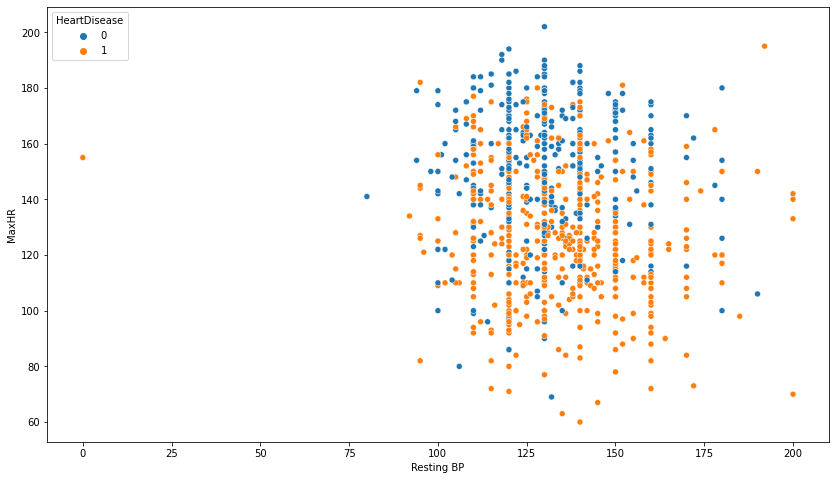

In [10]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='RestingBP', y='MaxHR', data=data, hue='HeartDisease')
plt.xlabel("Resting BP")
plt.ylabel("MaxHR")
plt.show()

<Figure size 1008x576 with 0 Axes>

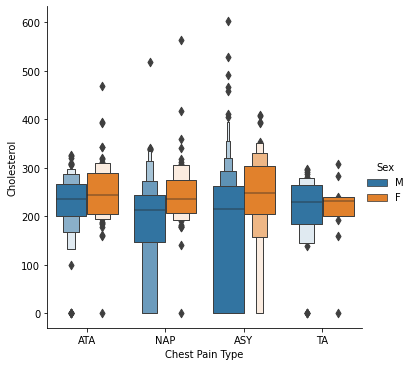

In [35]:
plt.figure(figsize=(14,8))
sns.catplot(x='ChestPainType', y='Cholesterol', hue='Sex', data=data, kind='boxen')
plt.xlabel("Chest Pain Type")
plt.ylabel("Cholesterol")
plt.show()

In [12]:
X = data.copy()
y = X.pop('HeartDisease')

#### Correlation scores

In [19]:
mi=[]
for label in X.columns:
    mi.append(mutual_info_score(data[label],y))

mi = pd.Series(mi, index=X.columns)
print(mi)

Age               0.073583
Sex               0.047477
ChestPainType     0.155988
RestingBP         0.062498
Cholesterol       0.223062
FastingBS         0.038040
RestingECG        0.006045
MaxHR             0.161544
ExerciseAngina    0.131680
Oldpeak           0.145127
ST_Slope          0.207474
dtype: float64


In [20]:
categorical_cols = [col_names for col_names in data.columns if data[col_names].dtype=='object']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

In [21]:
cat = pd.Series([data[col].nunique() for col in categorical_cols], index=categorical_cols)
cat

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [22]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
num_transformer = SimpleImputer(missing_values = 0, strategy = 'most_frequent')
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, numerical_cols),
                                                 ('cat', cat_transformer, categorical_cols)])

In [23]:
def my_pipeline(model):
    my_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                    ('normalizer', StandardScaler()),
                                    ('model', model)])
    return my_pipeline

In [24]:
def plot_score(n,score):
    plt.figure(figsize=(10,8))
    plt.plot(n, scores)
    plt.xlabel('N')
    plt.ylabel('Score')
    plt.show()

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state = 6)

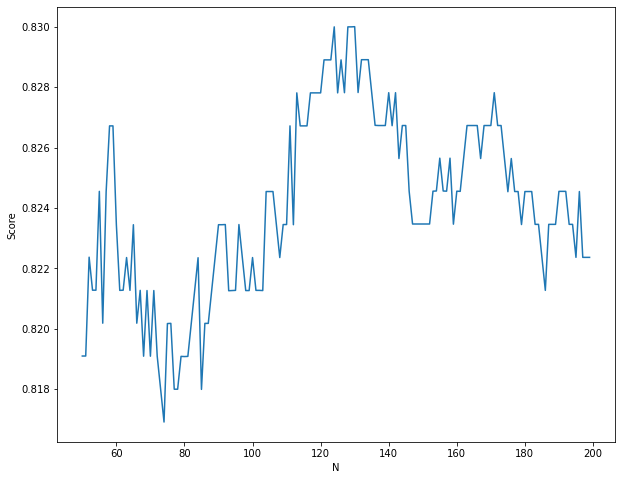

In [26]:
scores = []
for i in range(50,200):
    score = cross_validate(my_pipeline(RandomForestClassifier(n_estimators=i, random_state=0)), X, y)
    scores.append(score['test_score'].mean())
plot_score(range(50,200),scores)

In [27]:
RFCmodel = my_pipeline(RandomForestClassifier(n_estimators=138, random_state=0))
RFCmodel.fit(X_train, y_train)
preds = RFCmodel.predict(X_valid)
print("Accuracy Score: ", accuracy_score(y_valid, preds))

Accuracy Score:  0.8342391304347826


### Logistic Regression model

In [28]:
score = cross_validate(my_pipeline(LogisticRegression()), X, y)
print(score['test_score'].mean())

0.8289320503682586


### Support Vector Machine model

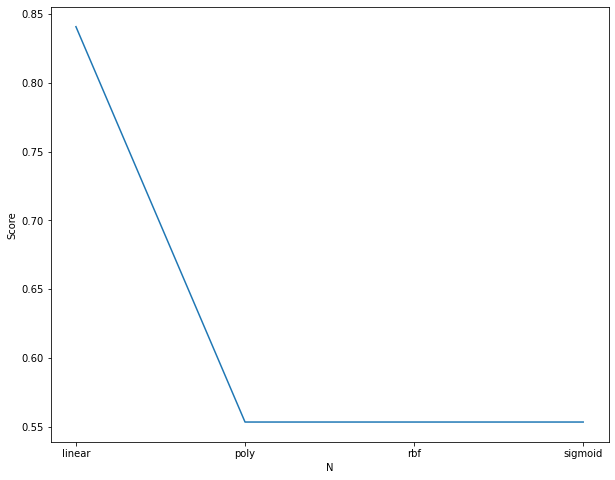

In [29]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
scores = []
for i in kernels:
    score = cross_validate(my_pipeline(SVC(kernel=i, C=0.001)), X, y)
    scores.append(score['test_score'].mean())

plot_score(kernels, scores)

In [30]:
svcmodel = my_pipeline(SVC(kernel='linear', C=0.001))
svcmodel.fit(X_train, y_train)
preds = svcmodel.predict(X_valid)
print("Accuracy Score: ", accuracy_score(y_valid, preds))

Accuracy Score:  0.842391304347826


### Naive Bayes model 

In [31]:
score = cross_validate(my_pipeline(GaussianNB()), X, y)
print(score['test_score'].mean())

0.8224281301971965


The best performing model if found to be Support Vector Machine with an accuracy score of 84.239%